# Mini Projeto DSA

#### <link>https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#</link>

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm

import imblearn
from imblearn.over_sampling import SMOTE

import time
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregando os Dados
df_original = pd.read_csv('online_shoppers_intention.csv')
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Análise Exploratória

In [3]:
df_original.shape

(12330, 18)

In [4]:
df_original .dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
df_original.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df_original.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [7]:
# Preparando os dados para o plot

# Cria uma cópia do dataset original
df = df_original.copy()

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [8]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [9]:
# Variáveis Contínuas
df[continuous].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1,0.000000,0.20,0.20,0.0
1,0.0,0.0,2,64.000000,0.00,0.10,0.0
2,0.0,0.0,1,0.000000,0.20,0.20,0.0
3,0.0,0.0,2,2.666667,0.05,0.14,0.0
4,0.0,0.0,10,627.500000,0.02,0.05,0.0


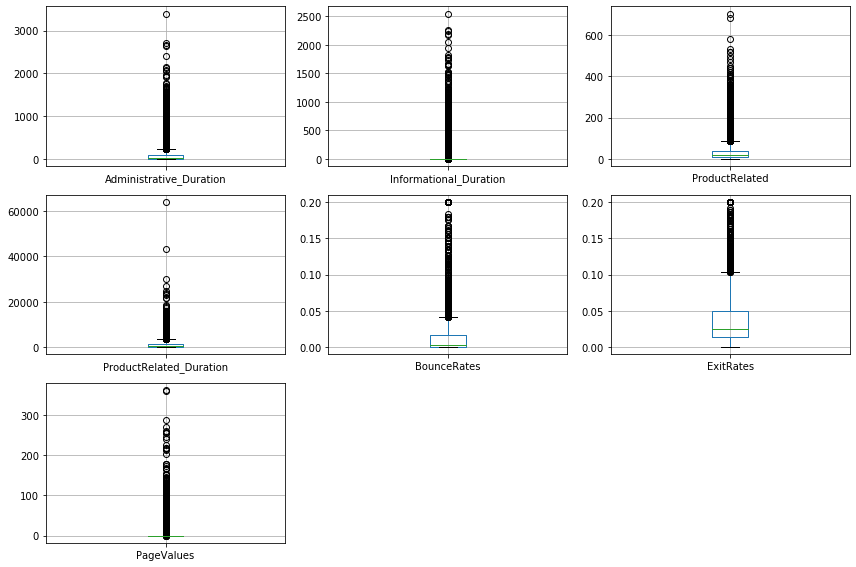

In [10]:
# Plot das Varíaveis Contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize= (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1)
    df.boxplot(col)
    plt.tight_layout()

In [11]:
# Transformação de log nas variáveis contínuas
df[continuous] = np.log1p(1 + df[continuous])

In [12]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

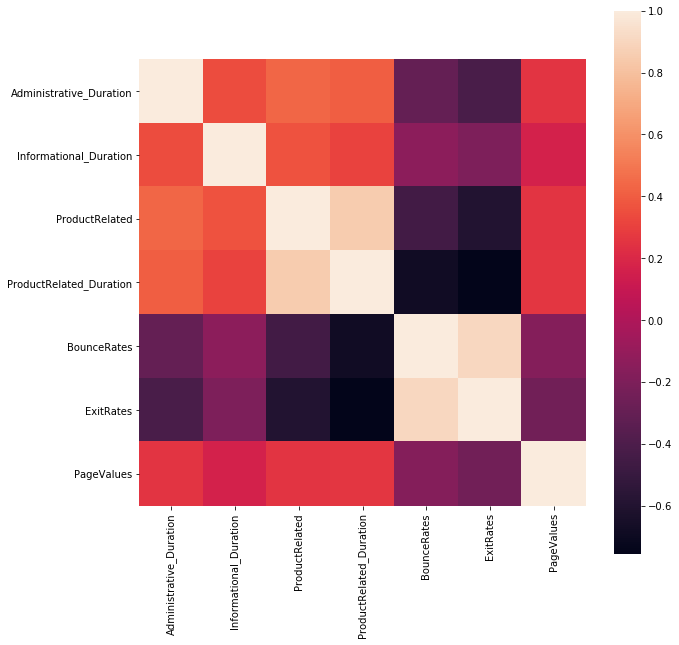

In [13]:
# Matriz de Correlação entre variáveis contínuas

# Área de Plotagem
plt.figure(figsize= (10,10))

# Matriz de Correlação
sns.heatmap(df[continuous].corr(), vmax = 1., square = True)

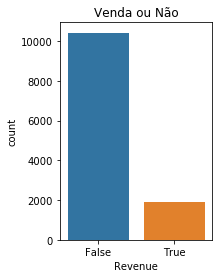

In [14]:
# Countplot Venda ou Não
plt.subplot(1, 2, 2)
plt.title("Venda ou Não")
sns.countplot(df["Revenue"])

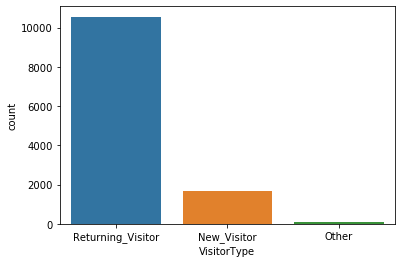

In [15]:
# Countplot Tipo de Visitante
plt.xlabel("Tipo de Visitante")
sns.countplot(df['VisitorType'])

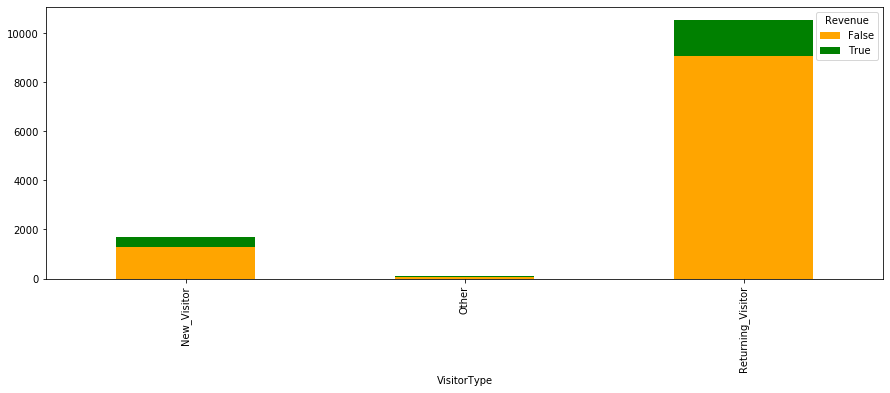

In [16]:
# Stacked Bar Tipo de Visitante x Revenue
pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar', stacked = True, figsize = (15,5), color = ['orange', 'green'])

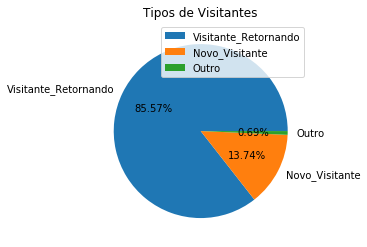

In [17]:
# Pie Chart Tipos de Visitantes
labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(df["VisitorType"].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()

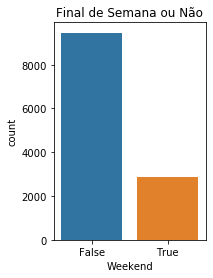

In [18]:
# Countplot Final de Semana ou Não
plt.subplot(1,2,1)
plt.title("Final de Semana ou Não")
sns.countplot(df['Weekend'])

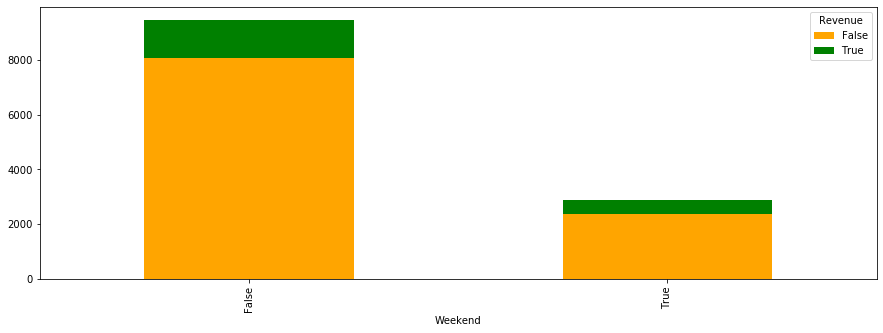

In [19]:
# Stacked Bar Final de Semana x Revenue
pd.crosstab(df['Weekend'], df['Revenue']).plot(kind='bar', stacked = True, figsize = (15,5), color = ['orange', 'green'])

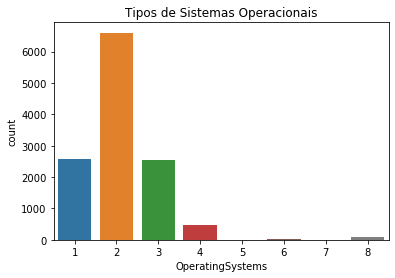

In [20]:
#  Countplot Tipos de Sistemas Operacionais
plt.title("Tipos de Sistemas Operacionais")
plt.xlabel("Sistema Operacional Usado")
sns.countplot(df['OperatingSystems'])

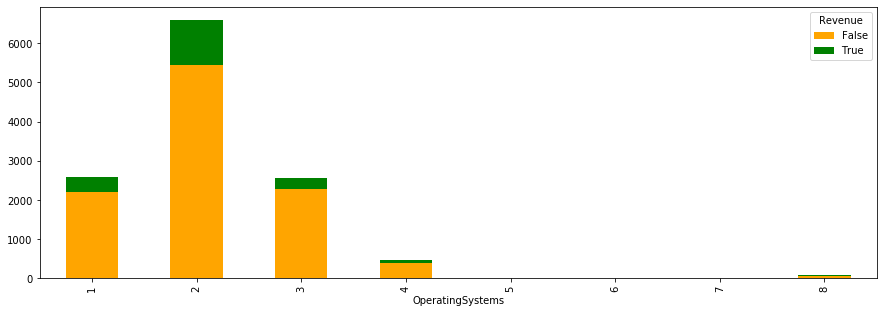

In [21]:
# Stacked Bar Tipo de SO x Revenue
pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar', stacked = True, figsize = (15,5), color = ['orange', 'green'])

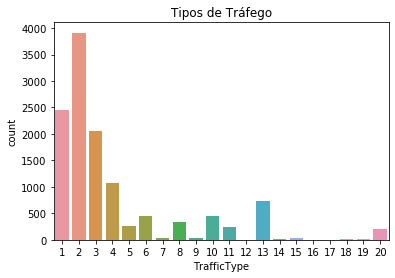

In [22]:
# Countplot Tipo de Tráfego
plt.title("Tipos de Tráfego")
plt.xlabel("Tipo de Trafégo")
sns.countplot(df['TrafficType'])

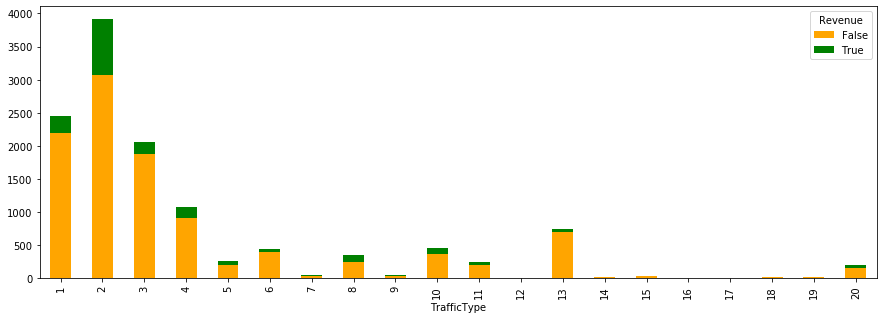

In [23]:
# Stacked Bar Tipos de Tráfego x Revenue
pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind='bar', stacked = True, figsize = (15, 5), color= ['orange', 'green'])

## Pré-Processamento dos Dados

In [24]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [25]:
# Cria o encoder
lb = LabelEncoder()

df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Remove valores missing eventualmente gerados
df_original.dropna(inplace=True)

In [26]:
df_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [27]:
df_original.shape

(12330, 18)

In [28]:
# Verificando se a variável resposta está balanceda
target_count = df_original.Revenue.value_counts()
target_count

False    10422
True      1908
Name: Revenue, dtype: int64

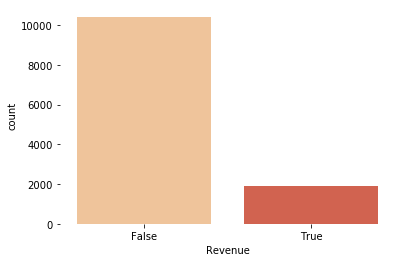

In [29]:
# Plot
sns.countplot(df_original.Revenue, palette="OrRd")
plt.box(False)

In [30]:
# Shape
df_original.shape

(12330, 18)

In [31]:
# Variáveis explicativas
df_original.iloc[:, 0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [32]:
# Variável Target
df_original.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

### Balanceamento de Classe - Oversampling

In [33]:
# Balanceando as classes
seed = 100

# Separa X e y
X = df_original.iloc[:, 0:17]
y = df_original.iloc[:, 17]

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

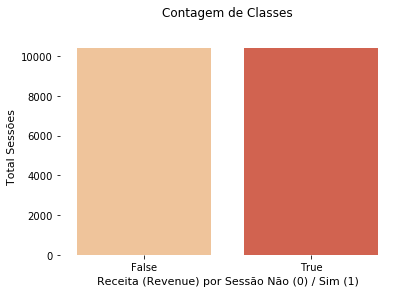

In [34]:
# Plot 
sns.countplot(y_res, palette="OrRd")
plt.box(False)
plt.xlabel('Receita (Revenue) por Sessão Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [35]:
# Ajsutando X e y
X = X_res
y = y_res

In [36]:
# Divisão em dados de Treino e Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state= 42)

## Modelo SVM

### Modelo com Kernel Linear e Dados Padronizados (Scaled)

In [37]:
# Padronização
X_treino_scaled = StandardScaler().fit_transform(X_treino)
X_teste_scaled = StandardScaler().fit_transform(X_teste)

In [38]:
# Cria o modelo
modelo_v1 = svm.SVC(kernel = 'linear')

In [39]:
# Treinamento
start = time.time()
modelo_v1.fit(X_treino_scaled, y_treino)
end = time.time()
print(f"Tempo de Treinamento do Modelo: {end - start}")

Tempo de Treinamento do Modelo: 7.428783893585205


In [40]:
# Previsões
previsoes_v1 = modelo_v1.predict(X_teste_scaled)

In [41]:
# Dicionário de métricas e metadados
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v1, y_teste),
               'Recall':recall_score(previsoes_v1, y_teste),
               'F1 Score':f1_score(previsoes_v1, y_teste),
               'Acurácia':accuracy_score(previsoes_v1, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v1)
               }

In [42]:
print("Métricas em teste:\n")
SVM_dict_v1

Métricas em teste:



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.7876077930373683,
 'Recall': 0.8905742145178764,
 'F1 Score': 0.8359322033898304,
 'Acurácia': 0.8452190598017268,
 'AUC': 0.8452928494485592}

### Otimização de Hiperparâmetros com Grid Search e Kernel RBF 

In [43]:
# Cria o modelo 
modelo_v2 = svm.SVC(kernel = 'rbf')

# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3 * 0.001, 0.001, 3 * 0.001])

# Grid de Hiperparâmtros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v2_grid_search_rbf = GridSearchCV(modelo_v2, svm_param_grid, cv = 3)

# Treinamento
modelo_v2_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print(f"Tempo de Treinamento do Modelo com Grid Search: {end - start}")

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v2_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v2_grid_search_rbf.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 113.07218027114868
Acurácia em Treinamento: 87.15%

Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.003}


In [44]:
# Previsões
previsoes_v2 = modelo_v2_grid_search_rbf.predict(X_teste_scaled)

In [45]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acurácia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)
              }

In [46]:
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.8489300542957522,
 'Recall': 0.9031600407747197,
 'F1 Score': 0.8752057951926243,
 'Acurácia': 0.8787975695554845,
 'AUC': 0.8788358244581546}

### Otimização de Hiperpâmetros com Grid Search e Kernel Polinomial

In [47]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel  = 'poly')

# Valores para o Grid
r_range = np.array([0.5, 1])
gamma_range = np.array([0.001, 0.01])
d_range = np.array([2, 3, 4])

# Grid de Hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_poly = GridSearchCV(modelo_v3, param_grid_poly, cv = 3)

# Treinamento
modelo_v3_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_poly.best_params_}")

Acurácia em Treinamento: 85.81%

Hiperparâmetros Ideais: {'coef0': 1.0, 'degree': 4, 'gamma': 0.01}


In [48]:
# Previsões
previsoes_v3 = modelo_v3_grid_search_poly.predict(X_teste_scaled)

In [49]:
# Dicionário de métricas e metadados
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, y_teste),
               'Recall':recall_score(previsoes_v3, y_teste),
               'F1 Score':f1_score(previsoes_v3, y_teste),
               'Acurácia':accuracy_score(previsoes_v3, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v3)
              }

In [50]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v3

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.8153944426700734,
 'Recall': 0.9014830508474576,
 'F1 Score': 0.8562803957739392,
 'Acurácia': 0.8629677006715702,
 'AUC': 0.8630286334387831}

In [51]:
# Concatena todos os dicionários em um dataframe do Pandas
resumo = pd.DataFrame({'SVM_dict_v1':pd.Series(SVM_dict_v1),
                       'SVM_dict_v2':pd.Series(SVM_dict_v2),
                       'SVM_dict_v3':pd.Series(SVM_dict_v3)})

In [52]:
resumo

,SVM_dict_v1,SVM_dict_v2,SVM_dict_v3
Modelo,SVM,SVM,SVM
Versão,1,2,3
Kernel,Linear com Dados Padronizados,RBF com Dados Padronizados,Polinomial com Dados Padronizados
Precision,0.787608,0.84893,0.815394
Recall,0.890574,0.90316,0.901483
F1 Score,0.835932,0.875206,0.85628
Acurácia,0.845219,0.878798,0.862968
AUC,0.845293,0.878836,0.863029


### Fazendo Previsões com o Modelo Treinando

In [53]:
# Novo Registro
novo_x = np.array([4.0, 5.56, 1.0, 3.78, 2.995, 6.00, 0.69, 0.70, 0.69, 0, 6, 1, 1, 3, 3, 2, False]).reshape(1, -1)

In [54]:
# Padronizando o Registro
novo_x_scaled = StandardScaler().fit_transform(novo_x)

In [55]:
# Previsão
previsao_novo_x = modelo_v2_grid_search_rbf.predict(novo_x_scaled)

In [56]:
previsao_novo_x

array([ True])

## FIM